In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/data.csv") 
genre_data = pd.read_csv('/content/data_by_genres.csv')
year_data = pd.read_csv('/content/data_by_year.csv')

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [ ]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


<Axes: >

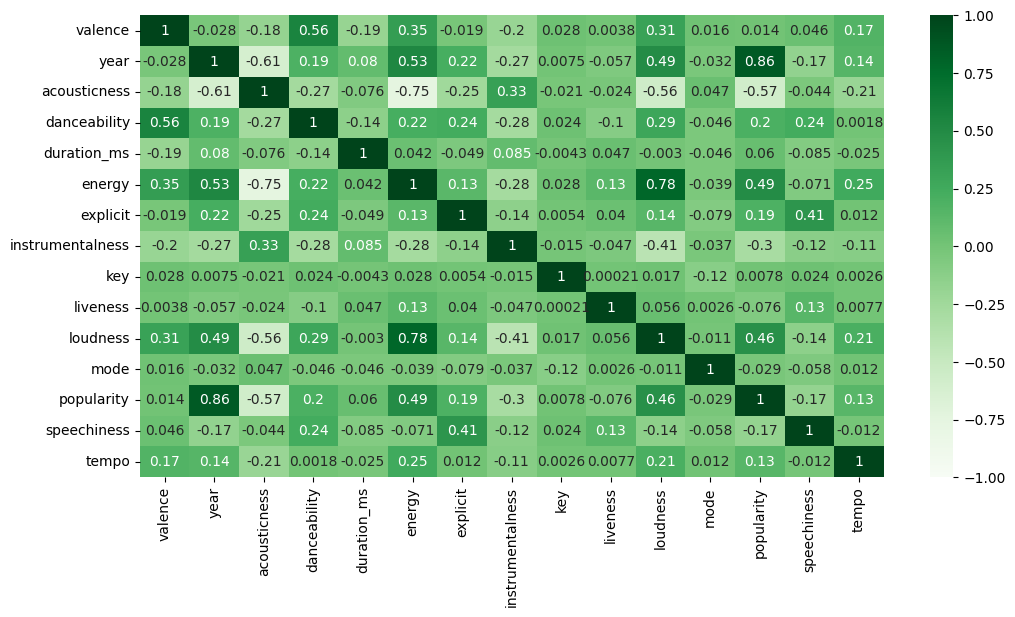

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="Greens")

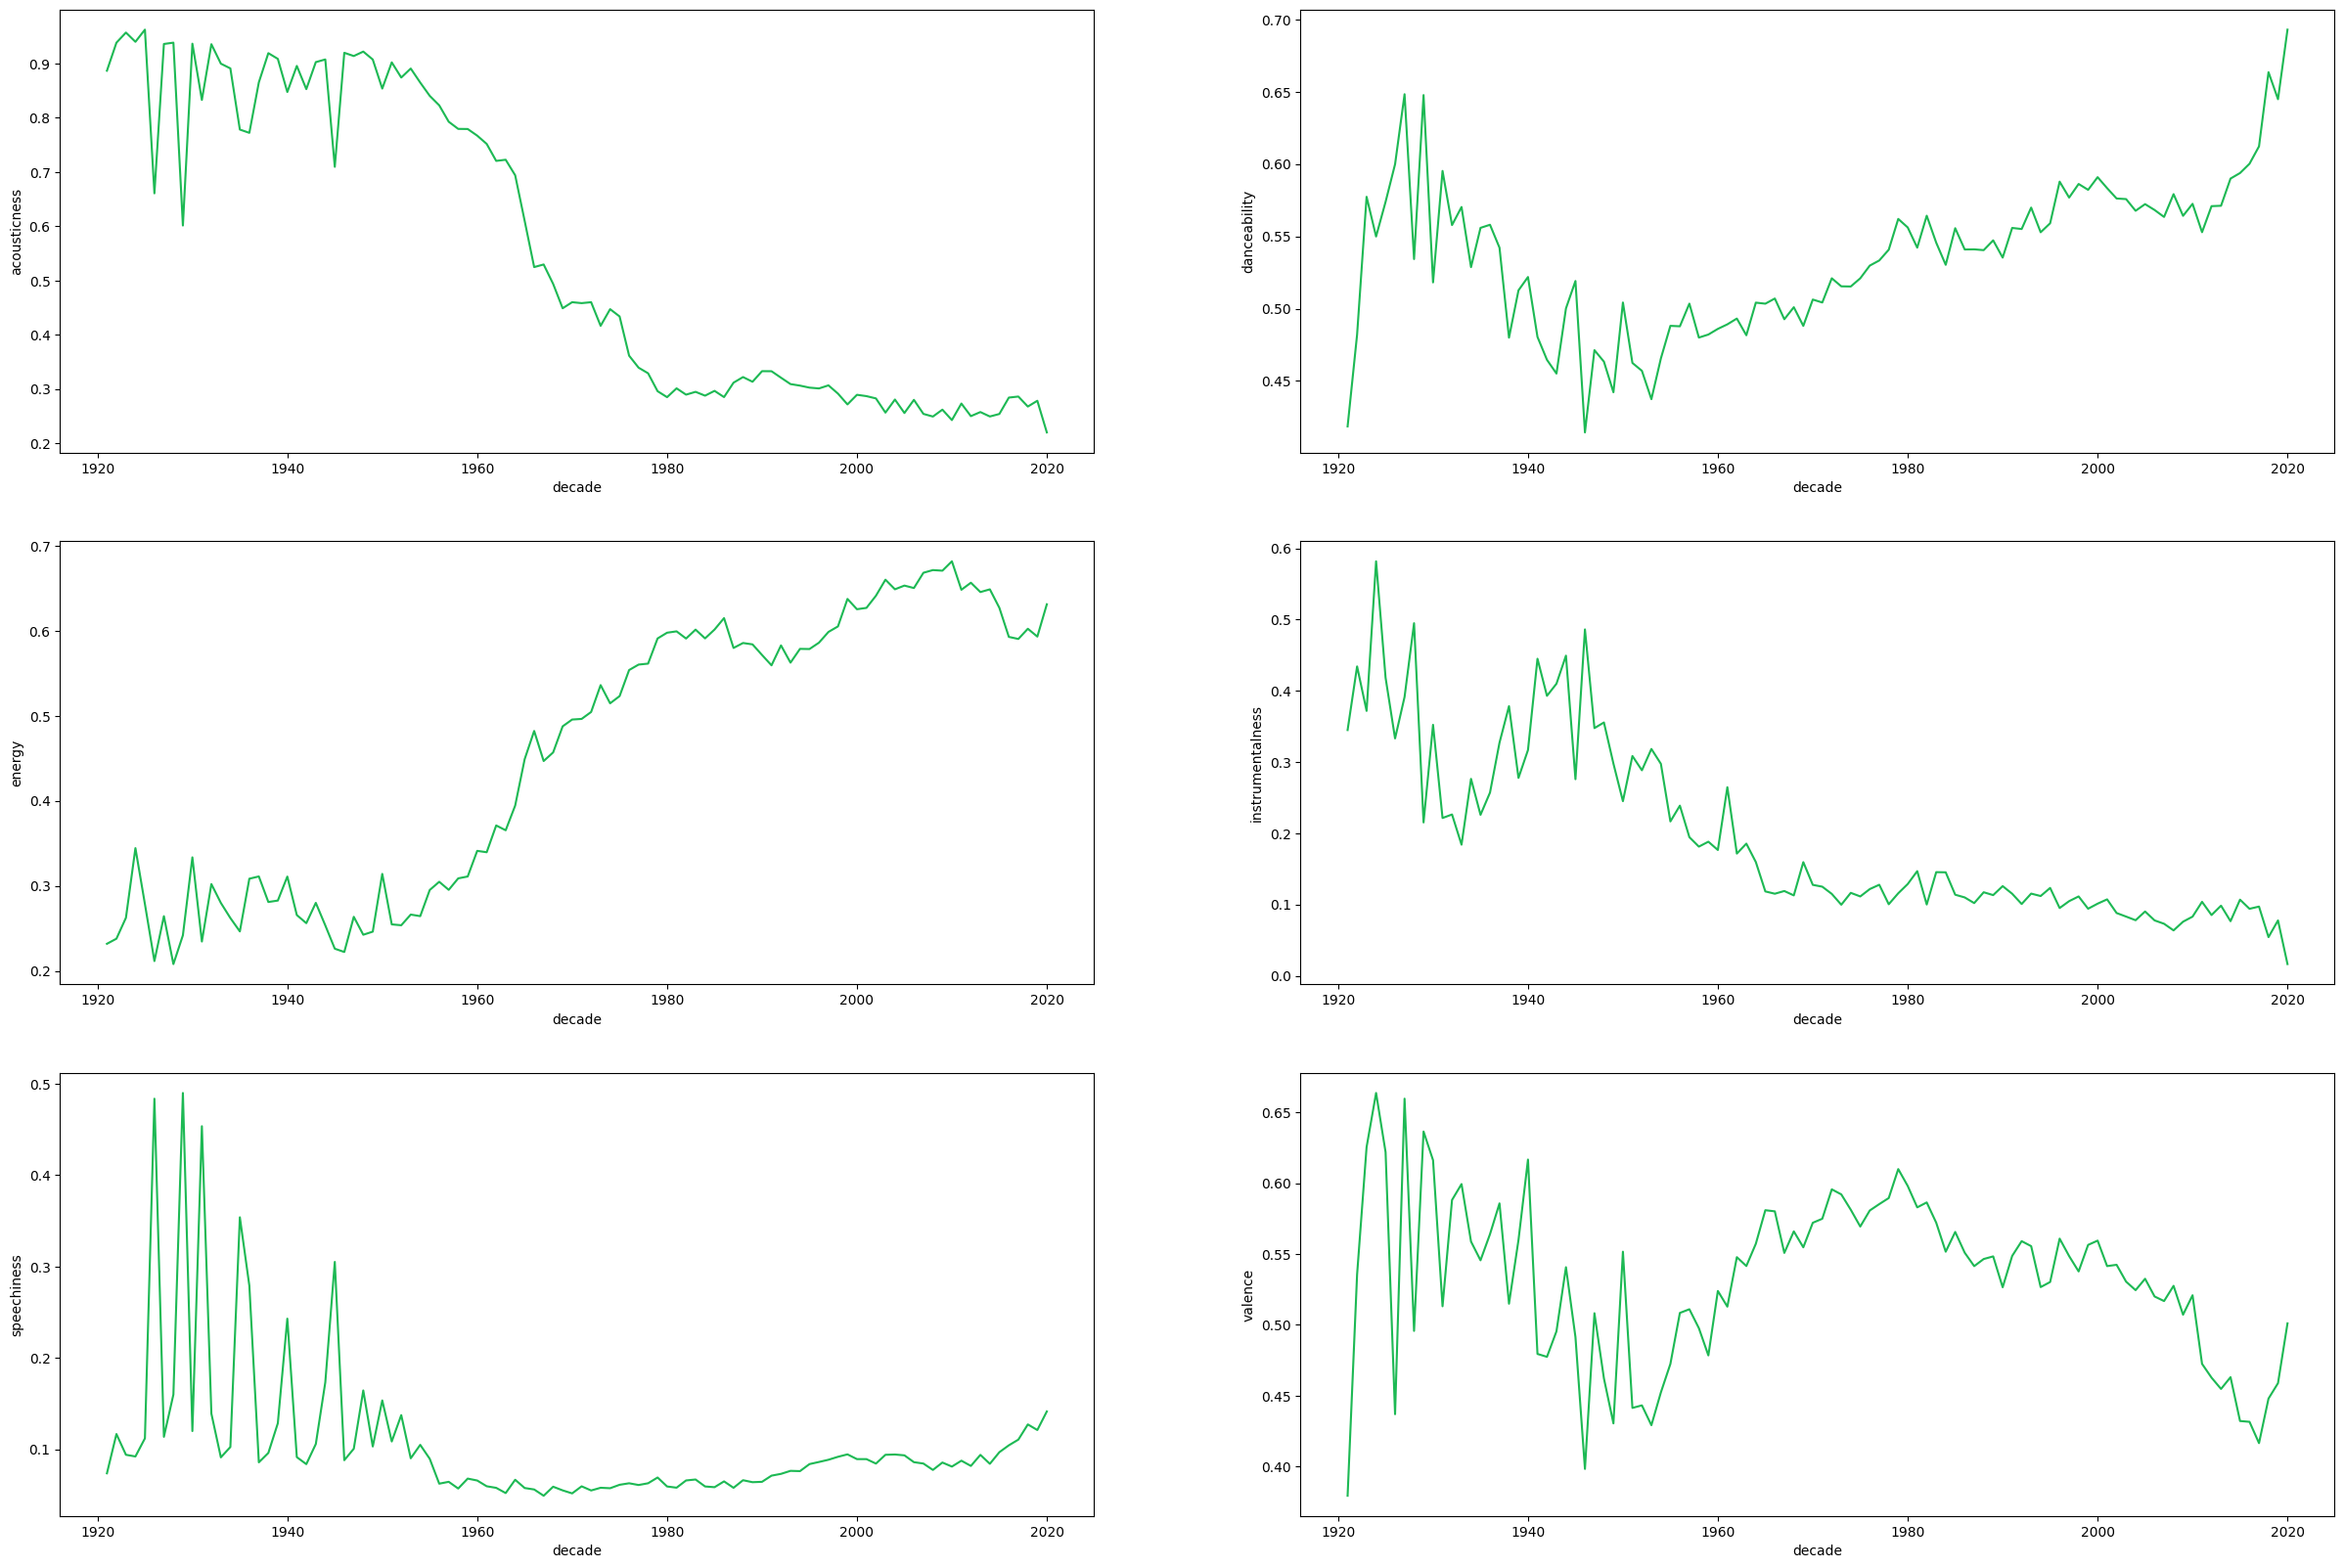

In [ ]:
sp1, elements = plt.subplots(3, 2) 

arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
row = 0
col = 0

for elem in arrElements: 
    data.groupby("year")[elem].mean().plot(ax=elements[row][col], figsize=(30,20), color="#1db954") 
    elements[row][col].set_xlabel("decade")
    elements[row][col].set_ylabel(elem)
    if col == 0:
        col = 1
    elif row == 0 and col == 1:
        row = 1
        col = 0
    elif row == 1 and col == 1:
        row = 2
        col = 0

Text(0.5, 1.0, 'Bar plot of explicit vs. non-explicit songs on Spotify through the years.')

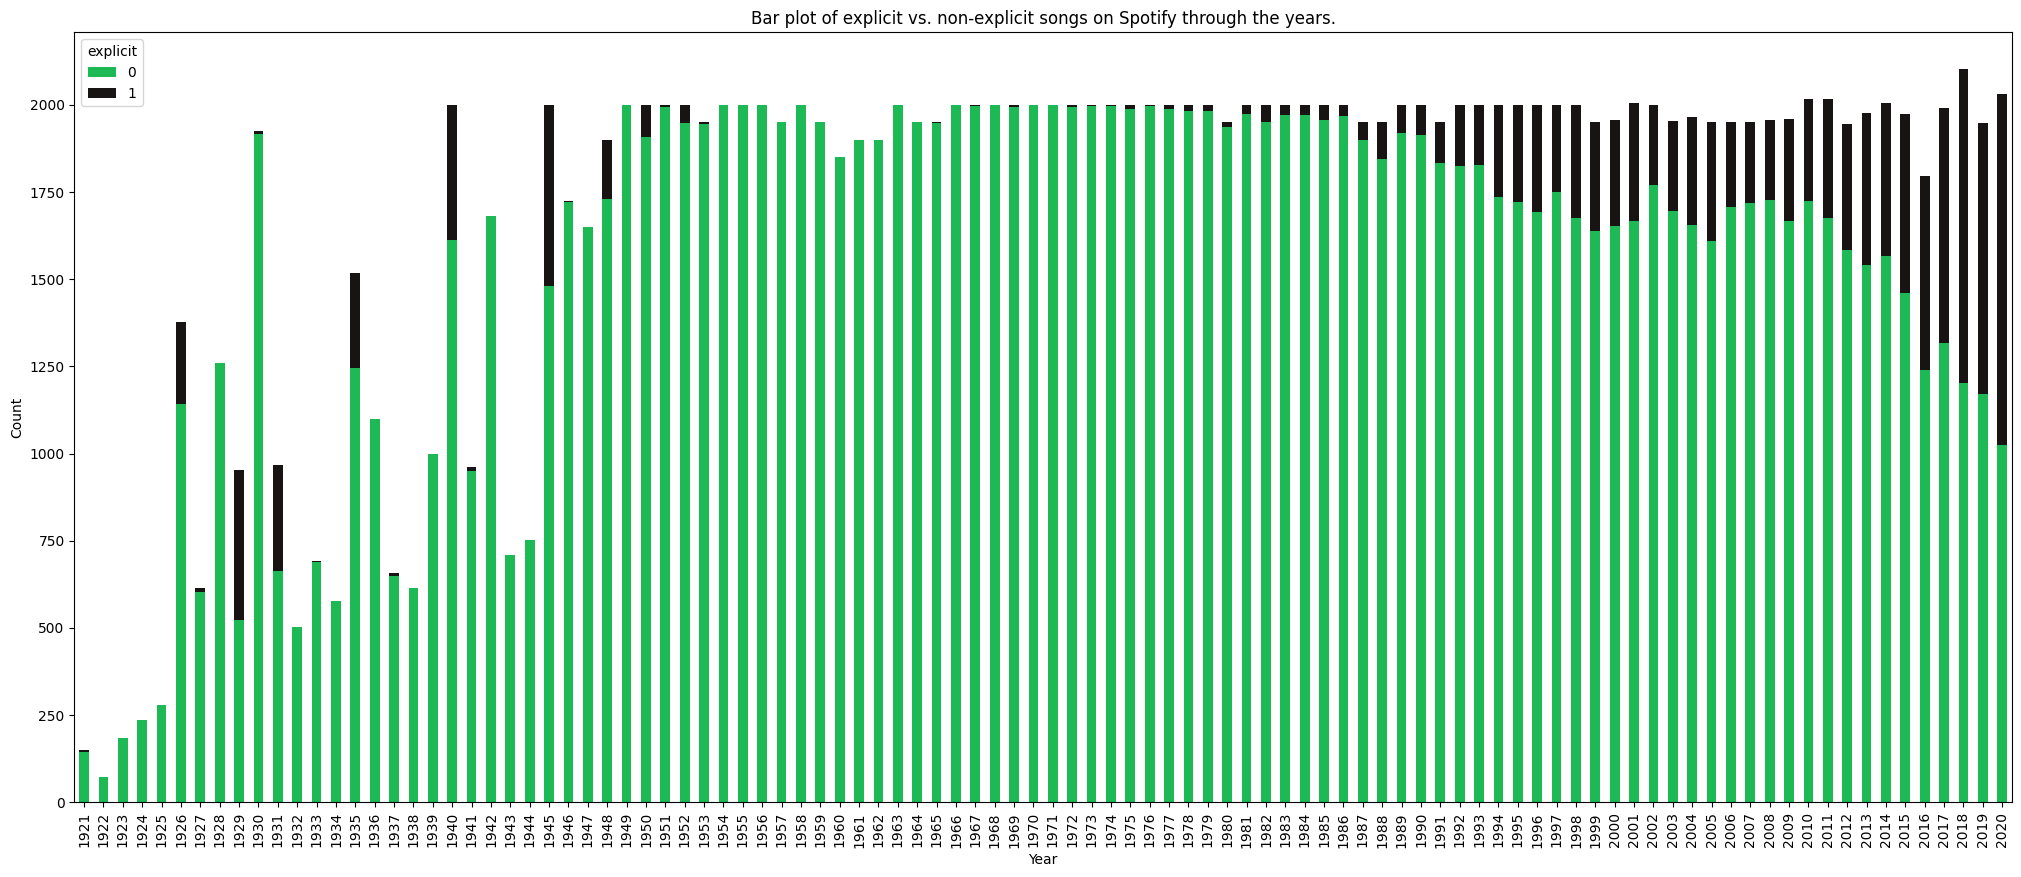

In [ ]:
data.groupby(["year", "explicit"]).size().unstack().plot(kind="bar", stacked="True", figsize=(25,10), color=["#1db954", "#191414"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Bar plot of explicit vs. non-explicit songs on Spotify through the years.")

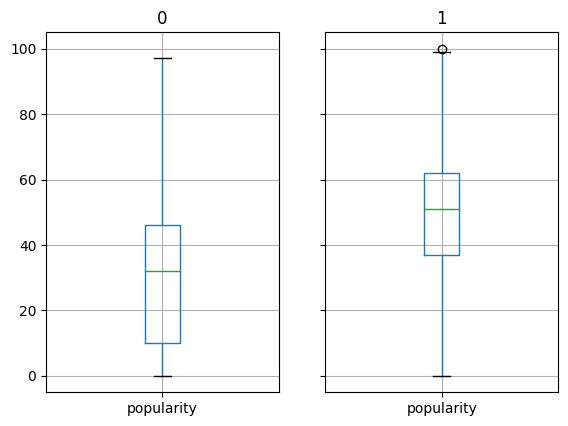

In [ ]:
data.groupby("explicit").boxplot(column="popularity")
plt.show()

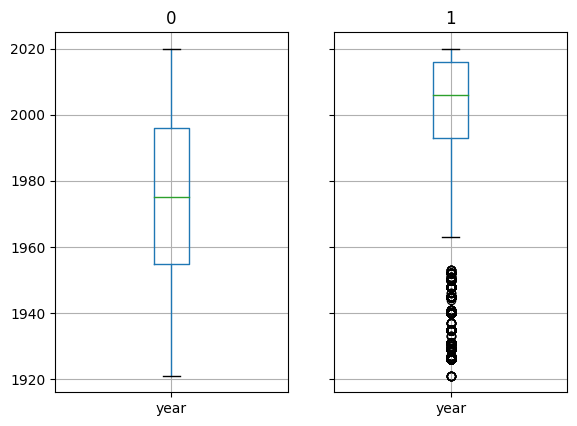

In [ ]:
data.groupby("explicit").boxplot(column="year")
plt.show()

In [ ]:
data.groupby("explicit").agg({"popularity": ["mean", "median", "std", len]})



popularity                          
               mean median        std     len
explicit                                     
0         30.161042   32.0  21.174037  156220
1         45.186171   51.0  23.948020   14433

In [ ]:
data.groupby("explicit").agg({"year": ["mean", "median", "std", len]})

year                           
                 mean  median        std     len
explicit                                        
0         1975.047177  1975.0  24.948785  156220
1         1995.621354  2006.0  28.597760   14433

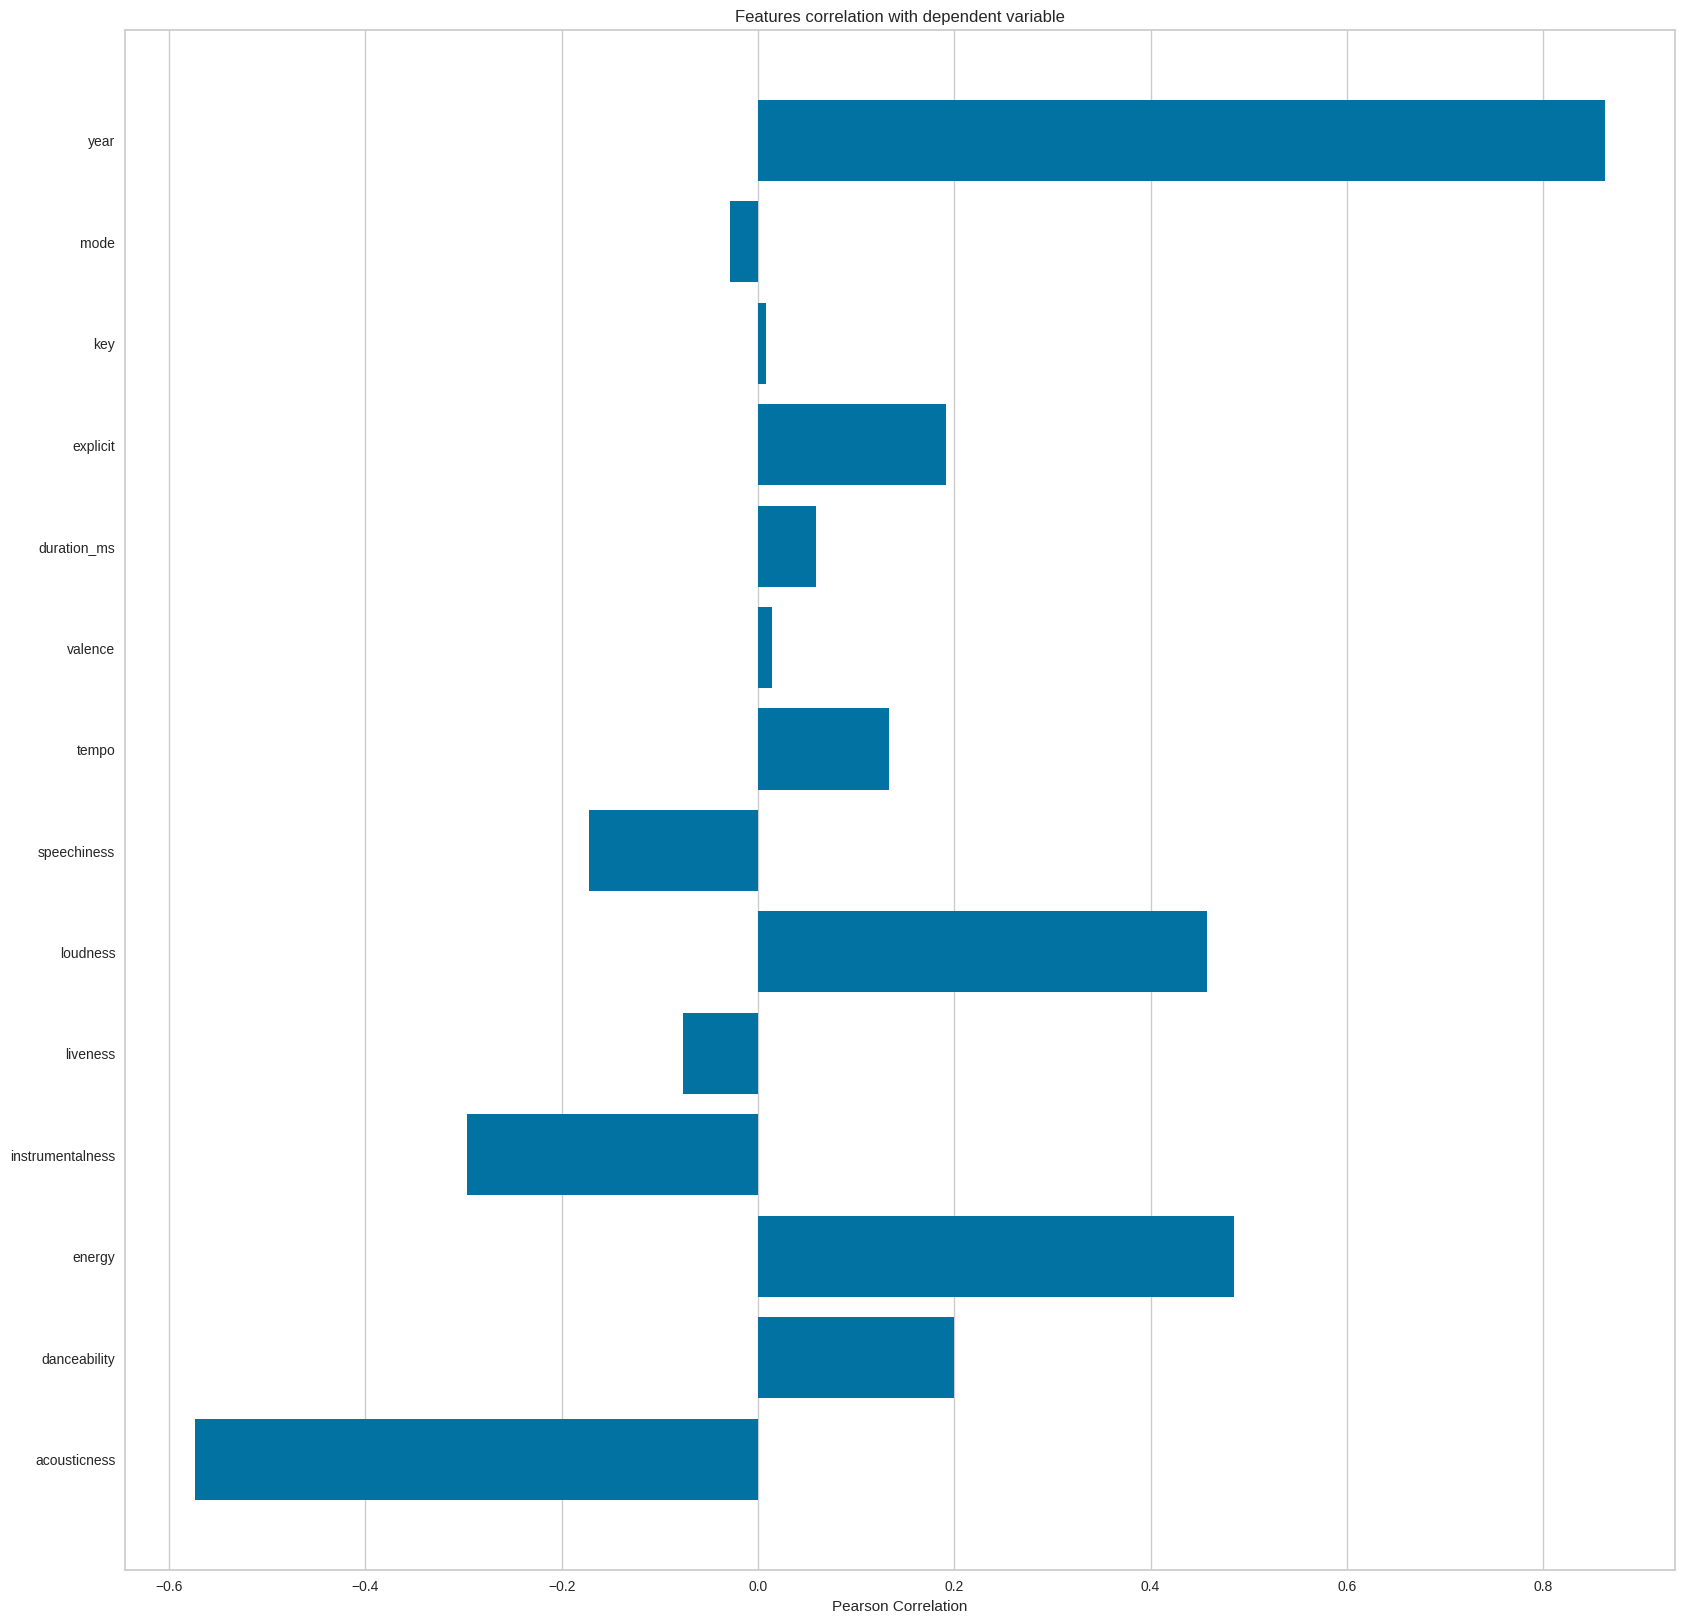

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)    
visualizer.show()

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [ ]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [ ]:
#Clustering Genres with K-Means
genre_data

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


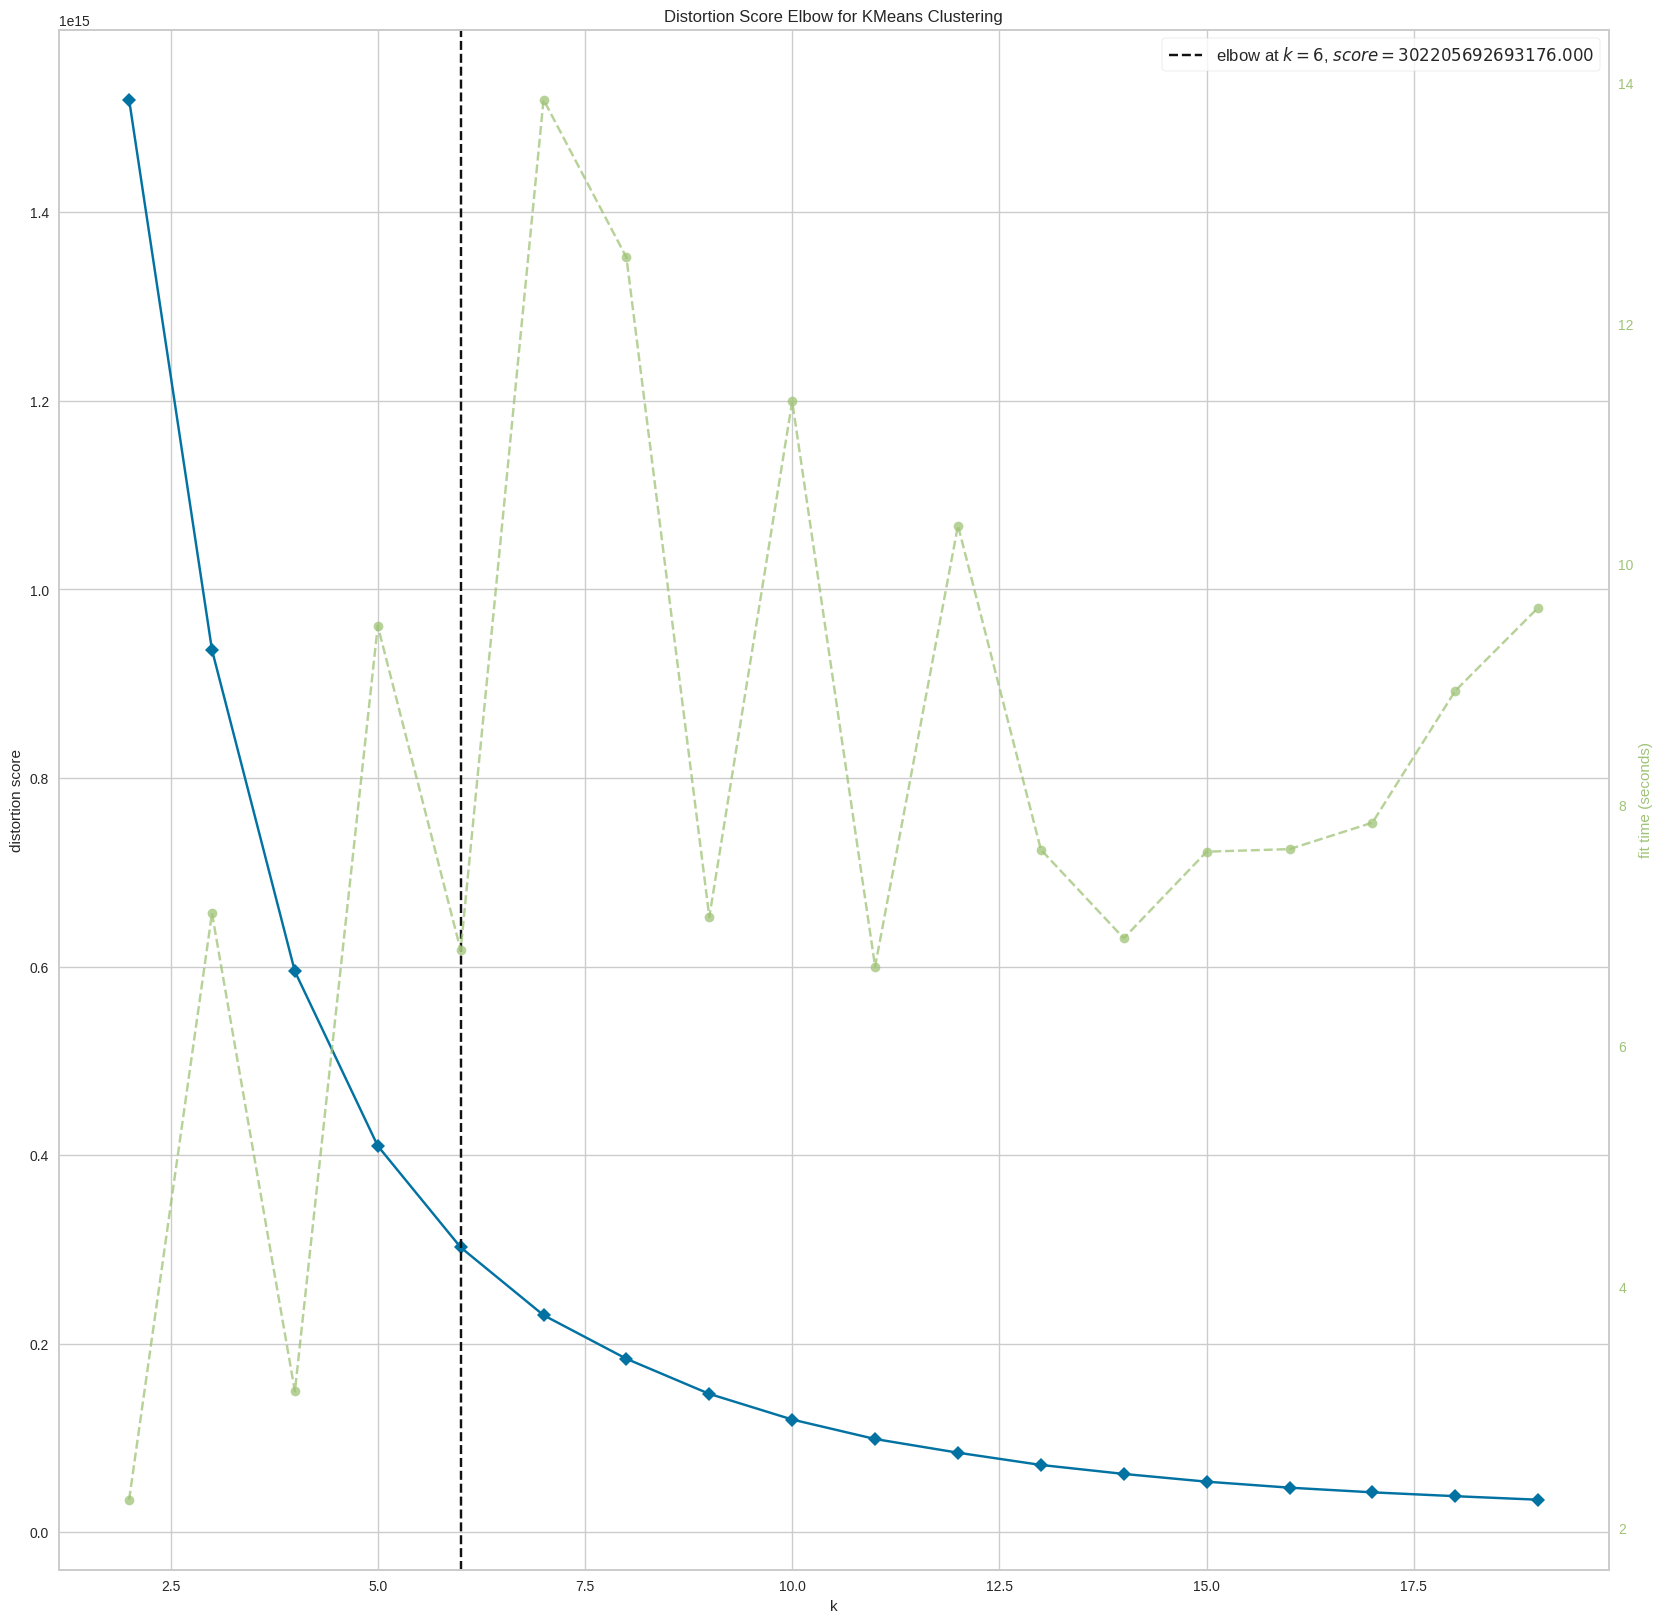

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Finding the Optimal Number of Clusters

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(X) 
visualizer.poof()  

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10,))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [ ]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.007s...
[t-SNE] Computed neighbors for 2973 samples in 0.268s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] Computed conditional probabilities in 0.083s
[t-SNE] Iteration 50: error = 78.8244095, gradient norm = 0.0273944 (50 iterations in 1.514s)
[t-SNE] Iteration 100: error = 76.2447815, gradient norm = 0.0015849 (50 iterations in 0.895s)
[t-SNE] Iteration 150: error = 76.1408768, gradient norm = 0.0004331 (50 iterations in 0.814s)
[t-SNE] Iteration 200: error = 76.1154327, gradient norm = 0.0001687 (50 iterations in 0.809s)
[t-SNE] Iteration 250: error = 76.1063232, gradient norm = 0.0000812 (50 iterations in 0.816s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106323
[t-SNE] Iteration 300: erro

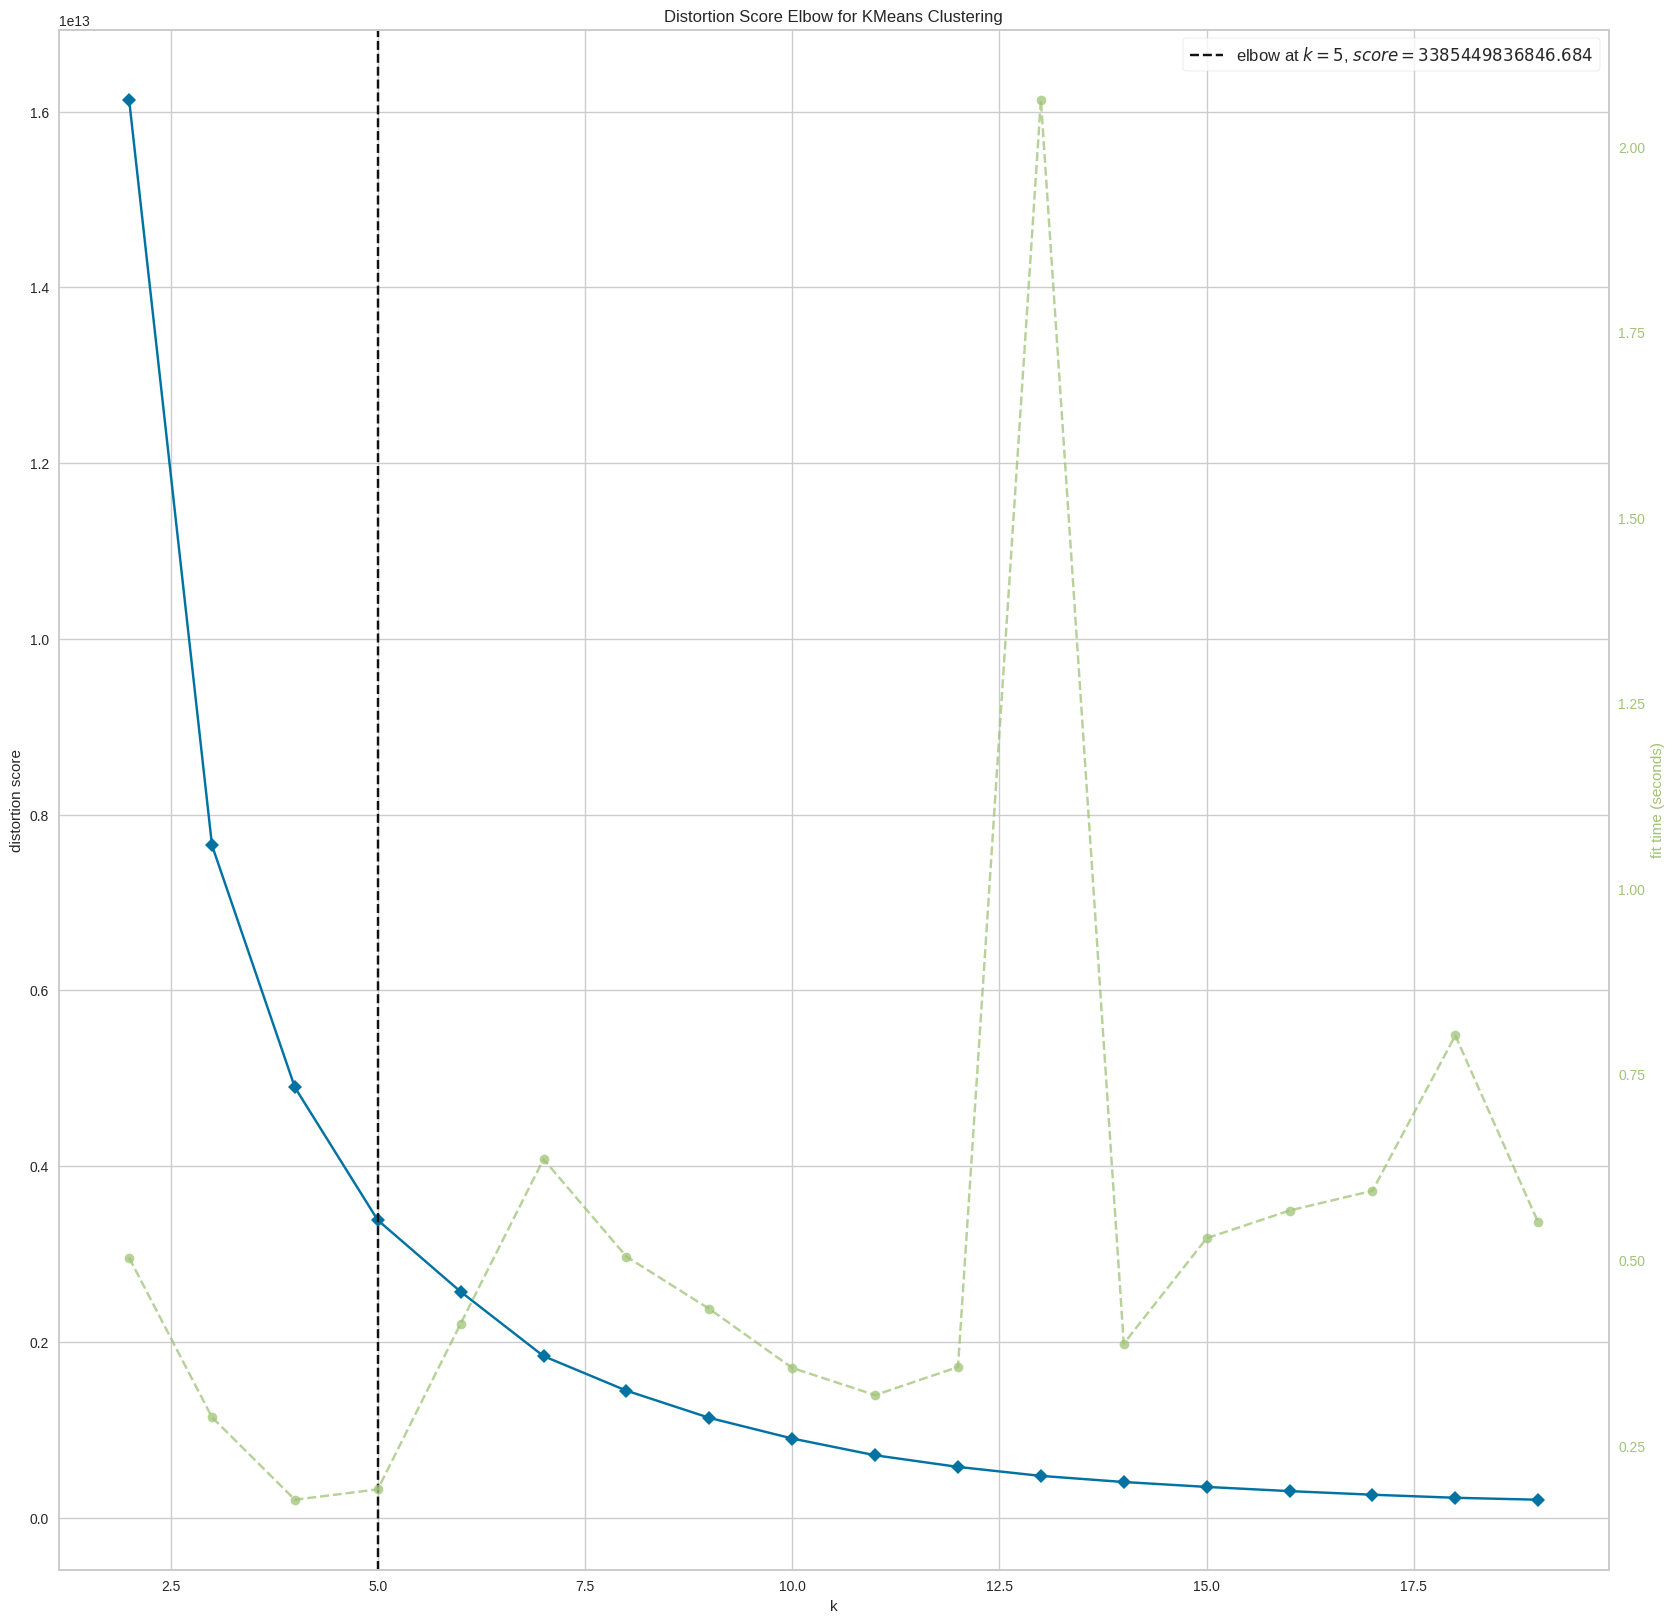

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Clustering Songs with K-Means
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(X) 
visualizer.poof()  

In [ ]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2))],verbose=True)

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
Initialization complete
Iteration 0, inertia 1577018.3875060244.
Iteration 1, inertia 1165922.3371635834.
Iteration 2, inertia 1124208.5725137936.
Iteration 3, inertia 1101560.0345784328.
Iteration 4, inertia 1086146.1372188802.
Iteration 5, inertia 1080103.5542701078.
Iteration 6, inertia 1074465.3396903053.
Iteration 7, inertia 1069874.507545621.
Iteration 8, inertia 1066802.673535436.
Iteration 9, inertia 1064475.651413795.
Iteration 10, inertia 1063051.882381518.
Iteration 11, inertia 1062229.5472409397.
Iteration 12, inertia 1061809.796410697.
Iteration 13, inertia 1061533.6636949172.
Iteration 14, inertia 1061325.3634462247.
Iteration 15, inertia 1061191.3416164713.
Iteration 16, inertia 1061075.6609223632.
Iteration 17, inertia 1060997.5845094472.
Iteration 18, inertia 1060954.044119368.
Iteration 19, inertia 1060916.260712831.
Iteration 20, inertia 1060882.4303524443.
Iteration 21, inertia 1060843.3304782433

In [ ]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
emotions_df = data.groupby(["mode", "key"]).agg("mean")
emotions_df

valence         year  acousticness  danceability    duration_ms  \
mode key                                                                     
0    0    0.499166  1973.644712      0.587416      0.524393  242126.680769   
     1    0.519506  1985.447013      0.388001      0.568104  230542.140799   
     2    0.489980  1972.114563      0.592803      0.505431  242456.649757   
     3    0.506204  1972.991965      0.542318      0.536261  227031.409147   
     4    0.488023  1979.722442      0.441686      0.523576  247840.481329   
     5    0.545388  1975.304021      0.523021      0.557425  243565.929223   
     6    0.541320  1984.489157      0.371919      0.575499  235047.915180   
     7    0.517325  1973.502289      0.599170      0.527095  239078.957841   
     8    0.533305  1980.899302      0.464867      0.569498  233462.981057   
     9    0.521313  1977.210127      0.473632      0.543162  238701.835859   
     10   0.536138  1979.514420      0.425138      0.585620  249483.762251   
     11   0.556580  1982.003650      0.340156      0.585962  234905.759082   
1    0    0.537001  1976.353670      0.499127      0.538296  228160.021044   
     1    0.497827  1979.610570      0.453700      0.559176  232696.169649   
     2    0.534843  1978.962525      0.448958      0.530075  232821.622390   
     3    0.499396  1967.364853      0.713908      0.488627  225748.533016   
     4    0.539140  1977.451311      0.504202      0.526893  221313.345104   
     5    0.526266  1972.210429      0.610841      0.516562  225237.550531   
     6    0.511521  1977.702236      0.494209      0.545491  222835.280306   
     7    0.546766  1977.216791      0.478755      0.539842  225117.463788   
     8    0.520999  1974.447456      0.562015      0.528759  229396.352201   
     9    0.558980  1978.503442      0.435979      0.533358  226793.727582   
     10   0.529896  1971.058734      0.644798      0.517854  222120.032221   
     11   0.522675  1979.883262      0.468887      0.543524  228050.728696   

            energy  explicit  instrumentalness  liveness   loudness  \
mode key                                                              
0    0    0.427636  0.068269          0.222619  0.197346 -12.343314   
     1    0.563786  0.177424          0.158772  0.200478 -10.148905   
     2    0.431926  0.054854          0.234234  0.197377 -12.420969   
     3    0.462547  0.106304          0.201685  0.202002 -11.948177   
     4    0.520911  0.102873          0.185694  0.212846 -11.206017   
     5    0.477654  0.108132          0.191494  0.207933 -11.563786   
     6    0.561839  0.173483          0.139382  0.211122 -10.208021   
     7    0.435091  0.057576          0.231185  0.198316 -12.147356   
     8    0.514544  0.161017          0.187285  0.203784 -10.992961   
     9    0.489708  0.070272          0.182180  0.193092 -11.678322   
     10   0.522525  0.180539          0.176119  0.208897 -11.195692   
     11   0.561219  0.193290          0.128498  0.220563 -10.579378   
1    0    0.470420  0.068234          0.153733  0.209566 -11.584419   
     1    0.491136  0.186081          0.161082  0.199728 -11.327677   
     2    0.518661  0.067605          0.147809  0.211672 -10.969732   
     3    0.370462  0.017433          0.229732  0.189204 -12.910557   
     4    0.490078  0.043732          0.142444  0.214576 -11.291716   
     5    0.421323  0.031011          0.183379  0.205072 -12.292544   
     6    0.480972  0.112005          0.160003  0.202176 -11.433042   
     7    0.489745  0.073985          0.149334  0.217761 -11.412357   
     8    0.455023  0.073299          0.175489  0.189346 -11.684828   
     9    0.533375  0.053379          0.131050  0.205904 -10.685175   
     10   0.406688  0.026766          0.175650  0.196204 -12.263772   
     11   0.510302  0.100875          0.154569  0.210204 -11.000302   

          popularity  speechiness       tempo  cluster_label  
mode key                                                      
0    0   

In [ ]:
confidences = []

for i in range(2): 
    mode_df = data.query("mode == @i") 
    for j in range (12): 
        modekey_df = mode_df.query("key == @j") 
        confidences.append(len(modekey_df)/len(mode_df))

emotions_df.insert(loc=0, column="support", value=data.groupby(["mode", "key"]).size())
emotions_df.insert(loc=1, column="support_ratio", value=emotions_df["support"]/len(data))
emotions_df.insert(loc=2, column="confidence_modekey", value=confidences)
emotions_df

support  support_ratio  confidence_modekey   valence         year  \
mode key                                                                      
0    0       4160       0.024377            0.083170  0.499166  1973.644712   
     1       3331       0.019519            0.066596  0.519506  1985.447013   
     2       4120       0.024143            0.082370  0.489980  1972.114563   
     3       1618       0.009481            0.032348  0.506204  1972.991965   
     4       5570       0.032639            0.111360  0.488023  1979.722442   
     5       5595       0.032786            0.111860  0.545388  1975.304021   
     6       3643       0.021347            0.072834  0.541320  1984.489157   
     7       4151       0.024324            0.082990  0.517325  1973.502289   
     8       2006       0.011755            0.040106  0.533305  1980.899302   
     9       5806       0.034022            0.116078  0.521313  1977.210127   
     10      4265       0.024992            0.085269  0.536138  1979.514420   
     11      5753       0.033712            0.115019  0.556580  1982.003650   
1    0      17440       0.102196            0.144568  0.537001  1976.353670   
     1       9555       0.055991            0.079206  0.497827  1979.610570   
     2      14703       0.086157            0.121880  0.534843  1978.962525   
     3       5679       0.033278            0.047076  0.499396  1967.364853   
     4       7363       0.043146            0.061035  0.539140  1977.451311   
     5      10835       0.063491            0.089816  0.526266  1972.210429   
     6       5098       0.029873            0.042260  0.511521  1977.702236   
     7      16652       0.097578            0.138036  0.546766  1977.216791   
     8       8745       0.051244            0.072491  0.520999  1974.447456   
     9      11765       0.068941            0.097526  0.558980  1978.503442   
     10      7883       0.046193            0.065346  0.529896  1971.058734   
     11      4917       0.028813            0.040759  0.522675  1979.883262   

          acousticness  danceability    duration_ms    energy  explicit  \
mode key                                                                  
0    0        0.587416      0.524393  242126.680769  0.427636  0.068269   
     1        0.388001      0.568104  230542.140799  0.563786  0.177424   
     2        0.592803      0.505431  242456.649757  0.431926  0.054854   
     3        0.542318      0.536261  227031.409147  0.462547  0.106304   
     4        0.441686      0.523576  247840.481329  0.520911  0.102873   
     5        0.523021      0.557425  243565.929223  0.477654  0.108132   
     6        0.371919      0.575499  235047.915180  0.561839  0.173483   
     7        0.599170      0.527095  239078.957841  0.435091  0.057576   
     8        0.464867      0.569498  233462.981057  0.514544  0.161017   
     9        0.473632      0.543162  238701.835859  0.489708  0.070272   
     10       0.425138      0.585620  249483.762251  0.522525  0.180539   
     11       0.340156      0.585962  234905.759082  0.561219  0.193290   
1    0        0.499127      0.538296  228160.021044  0.470420  0.068234   
     1        0.453700      0.559176  232696.169649  0.491136  0.186081   
     2        0.448958      0.530075  232821.622390  0.518661  0.067605   
     3        0.713908      0.488627  225748.533016  0.370462  0.017433   
     4        0.504202      0.526893  221313.345104  0.490078  0.043732   
     5        0.610841      0.516562  225237.550531  0.421323  0.031011   
     6        0.494209      0.545491  222835.280306  0.480972  0.112005   
     7        0.478755      0.539842  225117.463788  0.489745  0.073985   
     8        0.562015      0.528759  229396.352201  0.455023  0.073299   
     9        0.435979      0.533358  226793.727582  0.533375  0.053379   
     10       0.644798      0.517854  222120.032221  0.406688  0.026766   
     11       0.468887      0.543524  228050.728696  0.510302  0.100875   

    

In [ ]:
emotions = ["Innocently Sad, Love-Sick", "Despair, Wailing, Weeping", "Serious, Pious, Ruminating", "Deep Distress, Existential Angst", "Effeminate, Amorous, Restless", "Obscure, Plaintive, Funereal", "Gloomy, Passionate Resentment", "Discontent, Uneasiness", "Grumbling, Moaning, Wailing", "Tender, Plaintive, Pious", "Terrible, the Night, Mocking", "Solitary, Melancholic, Patience", "Innocently Happy", "Grief, Depressive", "Triumphant, Victorious War-Cries", "Cruel, Hard, Yet Full of Devotion", "Quarrelsome, Boisterous, Incomplete Pleasure", "Furious, Quick-Tempered, Passing Regret", "Conquering Difficulties, Sighs of Relief", "Serious, Magnificent, Fantasy", "Death, Eternity, Judgement", "Joyful, Pastoral, Declaration of Love", "Joyful, Quaint, Cheerful", "Harsh, Strong, Wild, Rage"]
emotions_df.insert(loc=3, column="emotion", value=emotions)
emotions_df = emotions_df.sort_values("support", ascending=False)
emotions_df

support  support_ratio  confidence_modekey  \
mode key                                               
1    0      17440       0.102196            0.144568   
     7      16652       0.097578            0.138036   
     2      14703       0.086157            0.121880   
     9      11765       0.068941            0.097526   
     5      10835       0.063491            0.089816   
     1       9555       0.055991            0.079206   
     8       8745       0.051244            0.072491   
     10      7883       0.046193            0.065346   
     4       7363       0.043146            0.061035   
0    9       5806       0.034022            0.116078   
     11      5753       0.033712            0.115019   
1    3       5679       0.033278            0.047076   
0    5       5595       0.032786            0.111860   
     4       5570       0.032639            0.111360   
1    6       5098       0.029873            0.042260   
     11      4917       0.028813            0.040759   
0    10      4265       0.024992            0.085269   
     0       4160       0.024377            0.083170   
     7       4151       0.024324            0.082990   
     2       4120       0.024143            0.082370   
     6       3643       0.021347            0.072834   
     1       3331       0.019519            0.066596   
     8       2006       0.011755            0.040106   
     3       1618       0.009481            0.032348   

                                               emotion   valence         year  \
mode key                                                                        
1    0                                Innocently Happy  0.537001  1976.353670   
     7                   Serious, Magnificent, Fantasy  0.546766  1977.216791   
     2                Triumphant, Victorious War-Cries  0.534843  1978.962525   
     9           Joyful, Pastoral, Declaration of Love  0.558980  1978.503442   
     5         Furious, Quick-Tempered, Passing Regret  0.526266  1972.210429   
     1                               Grief, Depressive  0.497827  1979.610570   
     8                      Death, Eternity, Judgement  0.520999  1974.447456   
     10                       Joyful, Quaint, Cheerful  0.529896  1971.058734   
     4    Quarrelsome, Boisterous, Incomplete Pleasure  0.539140  1977.451311   
0    9                        Tender, Plaintive, Pious  0.521313  1977.210127   
     11                Solitary, Melancholic, Patience  0.556580  1982.003650   
1    3               Cruel, Hard, Yet Full of Devotion  0.499396  1967.364853   
0    5                    Obscure, Plaintive, Funereal  0.545388  1975.304021   
     4                   Effeminate, Amorous, Restless  0.488023  1979.722442   
1    6        Conquering Difficulties, Sighs of Relief  0.511521  1977.702236   
     11                      Harsh, Strong, Wild, Rage  0.522675  1979.883262   
0    10                   Terrible, the Night, Mocking  0.536138  1979.514420   
     0                       Innocently Sad, Love-Sick  0.499166  1973.644712   
     7                          Discontent, Uneasiness  0.517325  1973.502289   
     2                      Serious, Pious, Ruminating  0.489980  1972.114563   
     6                   Gloomy, Passionate Resentment  0.541320  1984.489157   
     1                       Despair, Wailing, Weeping  0.519506  1985.447013   
     8                     Grumbling, Moaning, Wailing  0.533305  1980.899302   
     3                Deep Distress, Existential Angst  0.506204  1972.991965   

          acousticness  danceability    duration_ms    energy  explicit  \
mode key                                                                  
1    0        0.499127      0.538296  228160.021044  0.470420  0.068234   
     7        0.478755      0.539842  225117.463788  0.489745  0.073985   
     2        0.448958      0.530075  232821.622390  0.518661  0.067605   
     9        0.435979      0.533358  226793.727582  0.533375  0.053379

In [ ]:
emotions_df.query("support_ratio >= 0.05 and confidence_modekey >= 0.10")


support  support_ratio  confidence_modekey  \
mode key                                               
1    0      17440       0.102196            0.144568   
     7      16652       0.097578            0.138036   
     2      14703       0.086157            0.121880   

                                   emotion   valence         year  \
mode key                                                            
1    0                    Innocently Happy  0.537001  1976.353670   
     7       Serious, Magnificent, Fantasy  0.546766  1977.216791   
     2    Triumphant, Victorious War-Cries  0.534843  1978.962525   

          acousticness  danceability    duration_ms    energy  explicit  \
mode key                                                                  
1    0        0.499127      0.538296  228160.021044  0.470420  0.068234   
     7        0.478755      0.539842  225117.463788  0.489745  0.073985   
     2        0.448958      0.530075  232821.622390  0.518661  0.067605   

          instrumentalness  liveness   loudness  popularity  speechiness  \
mode key                                                                   
1    0            0.153733  0.209566 -11.584419   31.146846     0.093740   
     7            0.149334  0.217761 -11.412357   31.707543     0.091590   
     2            0.147809  0.211672 -10.969732   33.034891     0.083264   

               tempo  cluster_label  
mode key                             
1    0    117.651363       9.705333  
     7    117.627510       8.976579  
     2    118.654180      10.029586

In [ ]:
data.query("mode == 1 and key == 0").sort_values("popularity", ascending=False).head(10) # Top 10 Major C songs


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_label
19610,0.682,2020,0.4680,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,8
19407,0.557,2019,0.1220,['Harry Styles'],0.548,174000,0.816,0,6UelLqGlWMcVH1E5c4H7lY,0.000000,0,0.3350,-4.209,1,Watermelon Sugar,94,2019-12-13,0.0465,95.390,17
19609,0.522,2020,0.2440,"['Drake', 'Lil Durk']",0.761,261493,0.518,1,2SAqBLGA283SUiwJ3xOUVI,0.000035,0,0.1070,-8.871,1,Laugh Now Cry Later (feat. Lil Durk),93,2020-08-14,0.1340,133.976,8
19614,0.485,2020,0.2370,['Ariana Grande'],0.830,173711,0.585,1,6Im9k8u9iIzKMrmV7BWtlF,0.000000,0,0.2480,-6.476,1,34+35,92,2020-10-30,0.0940,109.978,8
38426,0.963,2020,0.0907,"['Lele Pons', 'Guaynaa']",0.905,155825,0.686,0,11EnQRgRMJwMAesfkB5pnu,0.000000,0,0.2660,-3.152,1,Se Te Nota (with Guaynaa),92,2020-09-02,0.0664,103.013,6
19406,0.641,2019,0.5980,['Clairo'],0.744,188387,0.619,0,7B3z0ySL9Rr0XvZEAjWZzM,0.003720,0,0.2310,-9.805,1,Sofia,90,2019-08-02,0.0390,112.997,6
19622,0.535,2020,0.0172,"['Juice WRLD', 'Marshmello']",0.625,205485,0.814,1,2Y0wPrPQBrGhoLn14xRYCG,0.000000,0,0.1580,-5.181,1,Come & Go (with Marshmello),90,2020-07-10,0.0657,144.991,8
11006,0.789,1977,0.0644,['Fleetwood Mac'],0.828,257800,0.492,0,0ofHAoxe9vBkTCp2UQIavz,0.004280,0,0.1280,-9.744,1,Dreams - 2004 Remaster,89,1977-02-04,0.0276,120.151,6
19409,0.553,2019,0.1920,['Post Malone'],0.695,215280,0.762,0,21jGcNKet2qwijlDFuPiPb,0.002440,0,0.0863,-3.497,1,Circles,89,2019-09-06,0.0395,120.042,17
38570,0.946,2020,0.3690,"['Clean Bandit', 'Mabel', '24kGoldn']",0.779,178374,0.705,0,27u7t9d7ZQoyjsCROHuZJ3,0.000008,0,0.1240,-3.895,1,Tick Tock (feat. 24kGoldn),88,2020-08-21,0.0344,101.022,6


In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 13.5 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

cid = '69f6b84e920e4ccda5e4c5a799262607'
secret = '272e597b32024ea396d90b8d783b2111'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)
def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]

    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)


def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')

In [ ]:
recommend_songs([{'name': 'Lucky Star', 'year':1983},
                {'name': 'Round Round', 'year': 2002},
                {'name': 'Give It Away', 'year': 1991},
                {'name': 'Strict Machine', 'year': 2003},
                {'name': 'Smile Like You Mean It', 'year': 2004}],  data)

[{'name': 'Helena Beat', 'year': 2011, 'artists': "['Foster The People']"},
 {'name': 'The Riddle', 'year': 2006, 'artists': '["Gigi D\'Agostino"]'},
 {'name': 'Hail to the King',
  'year': 2013,
  'artists': "['Avenged Sevenfold']"},
 {'name': 'You Were Right', 'year': 2016, 'artists': "['RÜFÜS DU SOL']"},
 {'name': 'Sadi Gali', 'year': 2011, 'artists': "['Lehmber Hussainpuri']"},
 {'name': 'Sugar (feat. Francesco Yates)',
  'year': 2015,
  'artists': "['Robin Schulz', 'Francesco Yates']"},
 {'name': 'La Planta', 'year': 2014, 'artists': "['Caos']"},
 {'name': 'Summer', 'year': 2014, 'artists': "['Calvin Harris']"},
 {'name': "DJ Got Us Fallin' In Love (feat. Pitbull)",
  'year': 2010,
  'artists': "['Usher', 'Pitbull']"},
 {'name': 'Island In The Sun', 'year': 2001, 'artists': "['Weezer']"}]